In [2]:
# Normal Distribution
from functools import partial
from experiments.common.utils.json_utils import lazy_json_dump
from experiments.carlbench.context_sampling import ContextSampler

# TODO make this a config
env_name = "CARLPendulumEnv"
sigma_rel = 0.1
n_samples = 1000
context_feature_names = ["m", "l", "g"]
seed = 455
cs_cls = partial(
    ContextSampler,
    env_name=env_name,
    sigma_rel=sigma_rel,
    n_samples=n_samples,
    context_feature_names=context_feature_names,
    seed=seed,
)
cs = cs_cls()
contexts = cs.sample_contexts()
lazy_json_dump(contexts, "tmp/contexts_train.json")
cs = cs_cls()
contexts = cs.sample_contexts()
lazy_json_dump(contexts, "tmp/contexts_eval.json")

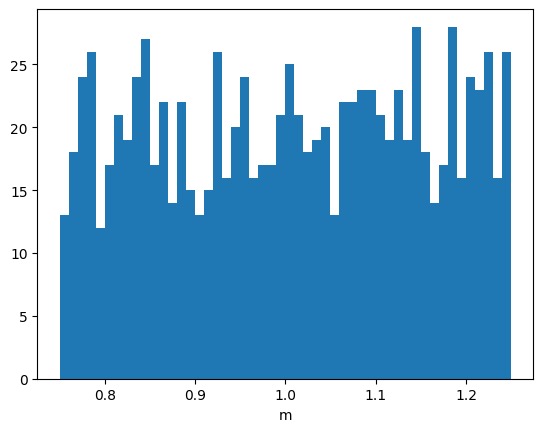

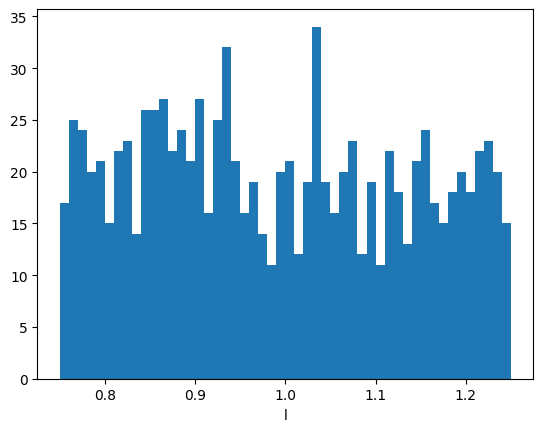

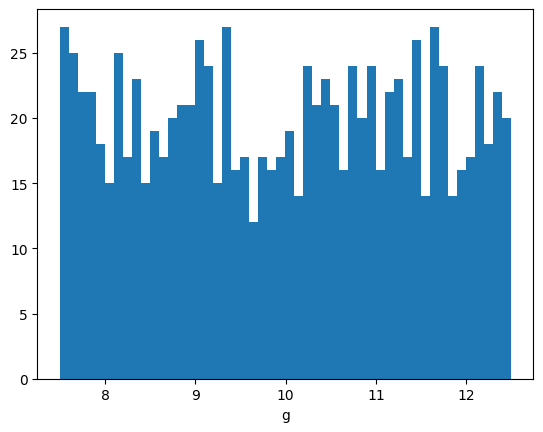

In [8]:
# Uniform Distribution
from functools import partial
from experiments.common.utils.json_utils import lazy_json_dump
from experiments.carlbench.context_sampling import ContextSampler
import matplotlib.pyplot as plt

env_name = "CARLPendulumEnv"
uniform_bounds_rel = (0.75, 1.25)
n_samples = 1000
context_feature_names = ["m", "l", "g"]
seed = 455
cs_cls = partial(
    ContextSampler,
    env_name=env_name,
    sigma_rel=None,
    n_samples=n_samples,
    context_feature_names=context_feature_names,
    seed=seed,
    uniform_bounds_rel=uniform_bounds_rel,
    uniform_distribution=True,
)
cs = cs_cls()
contexts = cs.sample_contexts()

for cf in context_feature_names:
    X = [c[cf] for c in contexts.values()]
    plt.hist(X, bins=50)
    plt.xlabel(cf)
    plt.show()
# lazy_json_dump(contexts, "tmp/contexts_train.json")
# cs = cs_cls()
# contexts = cs.sample_contexts()
# lazy_json_dump(contexts, "tmp/contexts_eval.json")